<a href="https://colab.research.google.com/github/argONNY/Data-processing-and-visualization-tools/blob/main/laba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  3 of 3 completed

1. Загрузка данных...
Размер данных: (251, 3)
Ticker            CLF         KO       UMC
Date                                      
2024-01-02  19.770000  56.383648  7.376353
2024-01-03  19.639999  56.515598  7.162546
2024-01-04  19.100000  56.327087  7.242724
2024-01-05  19.170000  56.242260  7.215998
2024-01-08  19.280001  56.656986  7.331810

2. Расчет дневных доходностей...
Размер доходностей: (250, 3)
Ticker           CLF        KO       UMC
Date                                    
2024-01-03 -0.006576  0.002340 -0.028985
2024-01-04 -0.027495 -0.003336  0.011194
2024-01-05  0.003665 -0.001506 -0.003690
2024-01-08  0.005738  0.007374  0.016049
2024-01-09 -0.031120 -0.001830 -0.014581

3. Анализ средних доходностей...
Средние дневные доходности:
CLF: -0.002618
KO: 0.000298
UMC: -0.000547

Ценная бумага с минимальной средней доходностью: CLF

4. Анализ дисперсий...
Дисперсии дневных доходностей:
CLF: 0.00079977
KO: 0.00006455
UMC: 0.00040121

Ценная бумага с минимальной дисперсией: K

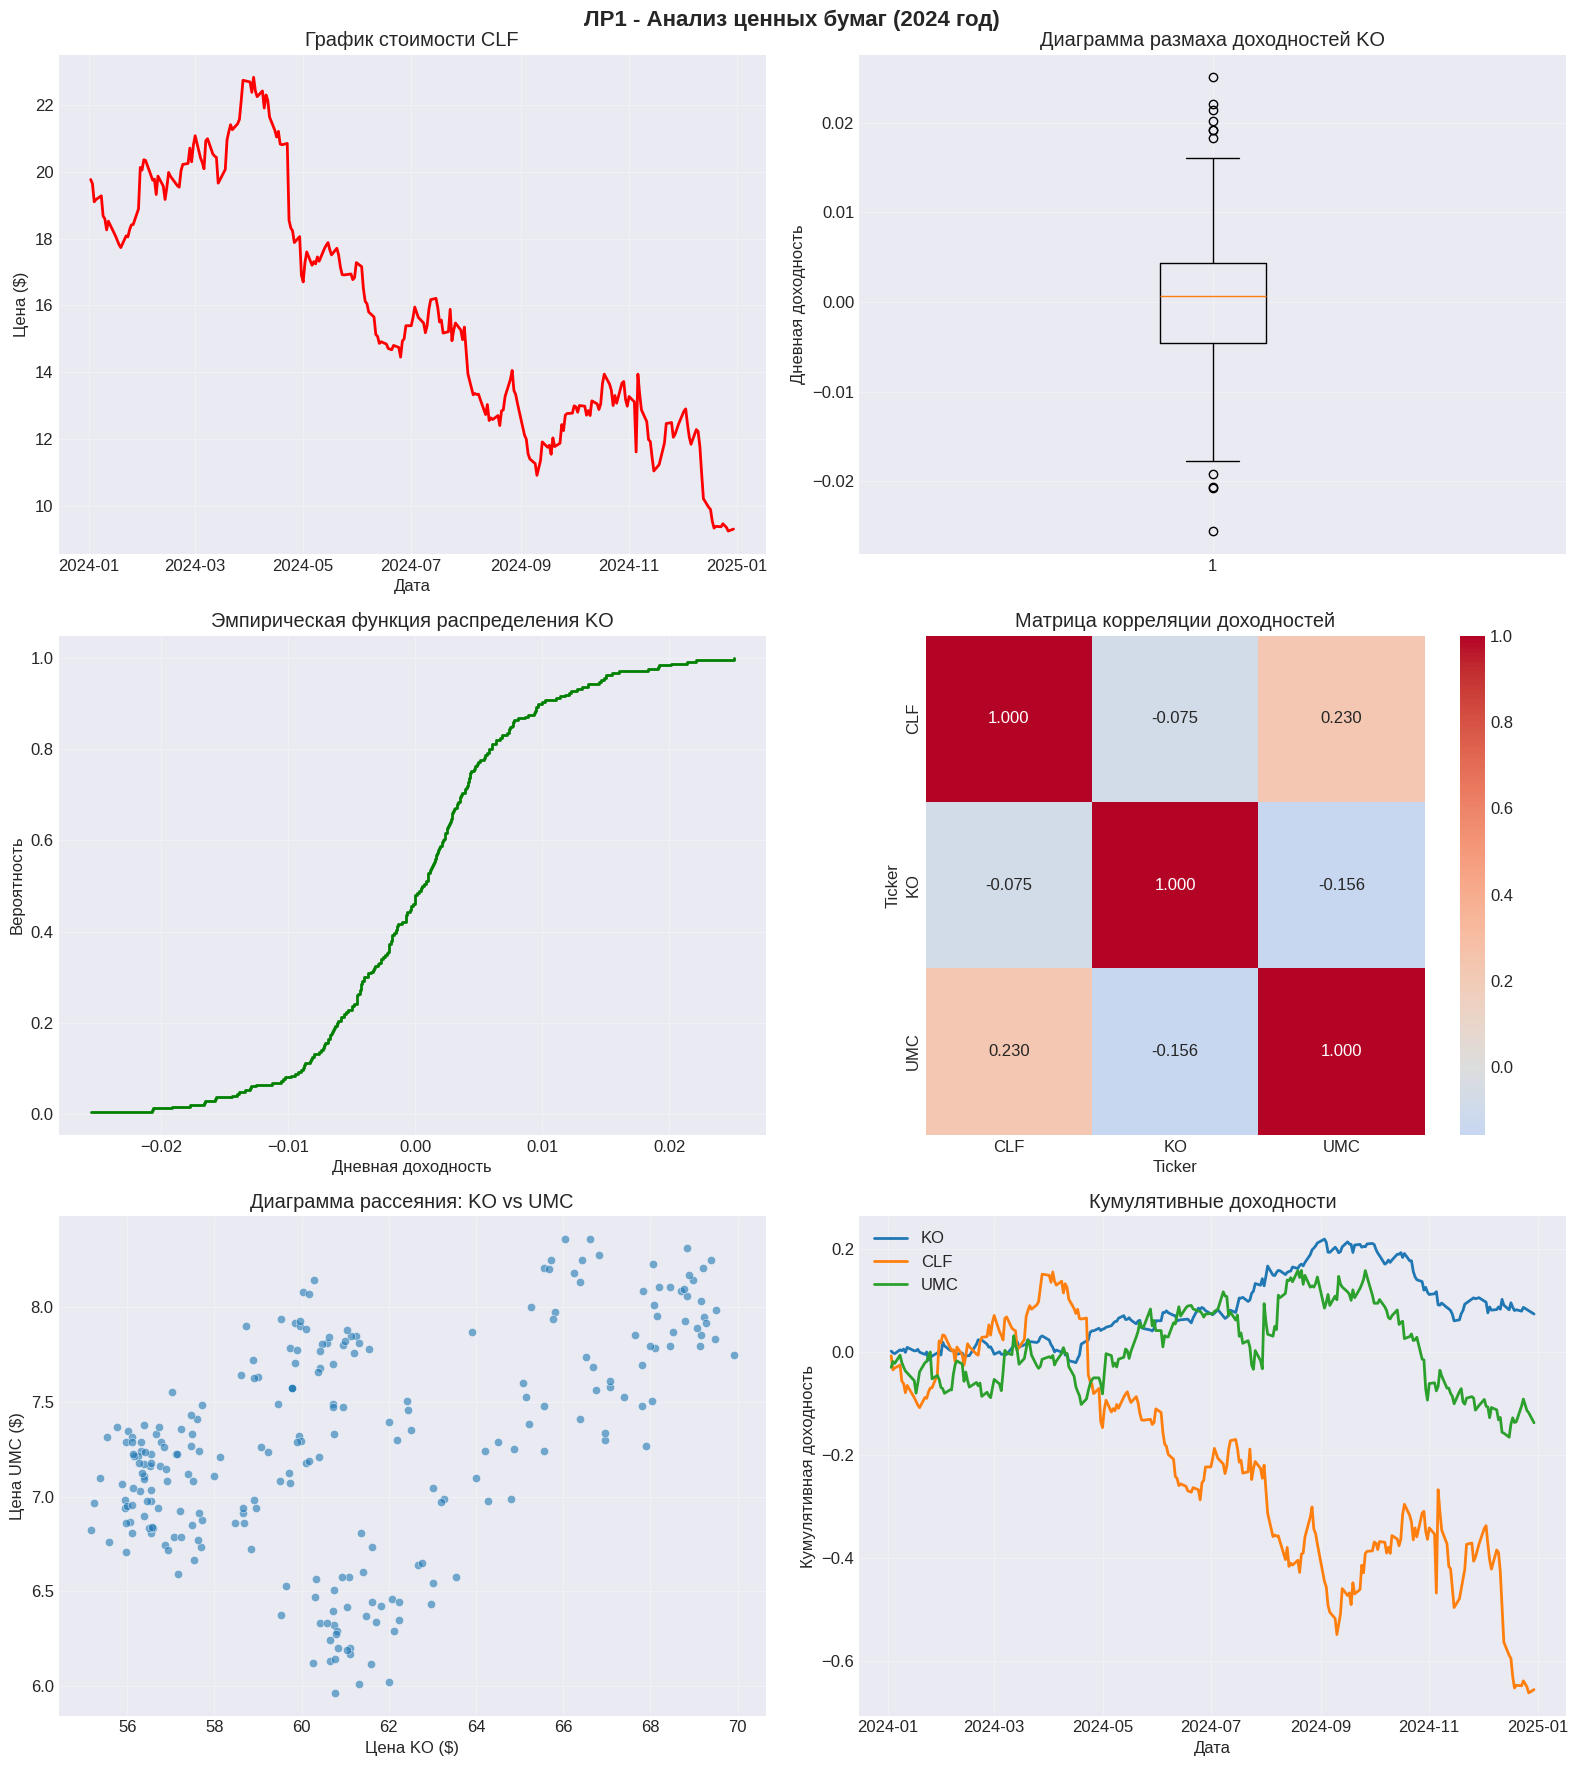


Итоговые результаты:
1. Минимальная средняя доходность: CLF (-0.002618)
2. Максимальная средняя доходность: KO (0.000298)
3. Минимальная дисперсия: KO (0.00006455)
4. Минимальная корреляция: KO - UMC (-0.1558)

Статистика доходностей:
        Средняя доходность  Дисперсия  Ст. отклонение   Медиана       Min  \
Ticker                                                                      
CLF              -0.002618   0.000800        0.028280 -0.003441 -0.114416   
KO                0.000298   0.000065        0.008034  0.000612 -0.025547   
UMC              -0.000547   0.000401        0.020030 -0.001165 -0.060433   

             Max  
Ticker            
CLF     0.200689  
KO      0.025046  
UMC     0.126514  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy import stats

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

tickers = ['KO', 'CLF', 'UMC']
start_date = '2024-01-01'
end_date = '2024-12-31'

print("1. Загрузка данных...")
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)['Close']
print(f"Размер данных: {data.shape}")
print(data.head())

print("\n2. Расчет дневных доходностей...")
returns = data.pct_change().dropna()
print(f"Размер доходностей: {returns.shape}")
print(returns.head())

print("\n3. Анализ средних доходностей...")
mean_returns = returns.mean()
print("Средние дневные доходности:")
for ticker, ret in mean_returns.items():
    print(f"{ticker}: {ret:.6f}")

min_mean_ticker = mean_returns.idxmin()
print(f"\nЦенная бумага с минимальной средней доходностью: {min_mean_ticker}")

print("\n4. Анализ дисперсий...")
var_returns = returns.var()
print("Дисперсии дневных доходностей:")
for ticker, var in var_returns.items():
    print(f"{ticker}: {var:.8f}")

min_var_ticker = var_returns.idxmin()
print(f"\nЦенная бумага с минимальной дисперсией: {min_var_ticker}")

max_mean_ticker = mean_returns.idxmax()
print(f"Ценная бумага с максимальной средней доходностью: {max_mean_ticker}")

print("\n5. Матрица корреляции...")
corr_matrix = returns.corr()
print("Матрица корреляции:")
print(corr_matrix)

corr_values = corr_matrix.unstack()
corr_values = corr_values[corr_values < 1]
min_corr_pair = corr_values.idxmin()
min_corr_value = corr_values.min()
print(f"\nПара с минимальной корреляцией: {min_corr_pair[0]} и {min_corr_pair[1]}")
print(f"Значение корреляции: {min_corr_value:.4f}")

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('ЛР1 - Анализ ценных бумаг (2024 год)', fontsize=16, fontweight='bold')

axes[0, 0].plot(data[min_mean_ticker], linewidth=2, color='red')
axes[0, 0].set_title(f'График стоимости {min_mean_ticker}')
axes[0, 0].set_xlabel('Дата')
axes[0, 0].set_ylabel('Цена ($)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].boxplot(returns[max_mean_ticker].dropna(), vert=True)
axes[0, 1].set_title(f'Диаграмма размаха доходностей {max_mean_ticker}')
axes[0, 1].set_ylabel('Дневная доходность')
axes[0, 1].grid(True, alpha=0.3)

sorted_returns = np.sort(returns[min_var_ticker].dropna())
ecdf = np.arange(1, len(sorted_returns) + 1) / len(sorted_returns)
axes[1, 0].step(sorted_returns, ecdf, where='post', linewidth=2, color='green')
axes[1, 0].set_title(f'Эмпирическая функция распределения {min_var_ticker}')
axes[1, 0].set_xlabel('Дневная доходность')
axes[1, 0].set_ylabel('Вероятность')
axes[1, 0].grid(True, alpha=0.3)

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, ax=axes[1, 1])
axes[1, 1].set_title('Матрица корреляции доходностей')

ticker1, ticker2 = min_corr_pair
axes[2, 0].scatter(data[ticker1], data[ticker2], alpha=0.6, edgecolors='w', linewidth=0.5)
axes[2, 0].set_title(f'Диаграмма рассеяния: {ticker1} vs {ticker2}')
axes[2, 0].set_xlabel(f'Цена {ticker1} ($)')
axes[2, 0].set_ylabel(f'Цена {ticker2} ($)')
axes[2, 0].grid(True, alpha=0.3)

for i, ticker in enumerate(tickers):
    axes[2, 1].plot(returns[ticker].cumsum(), label=ticker, linewidth=2)
axes[2, 1].set_title('Кумулятивные доходности')
axes[2, 1].set_xlabel('Дата')
axes[2, 1].set_ylabel('Кумулятивная доходность')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("Итоговые результаты:")
print("="*50)
print(f"1. Минимальная средняя доходность: {min_mean_ticker} ({mean_returns[min_mean_ticker]:.6f})")
print(f"2. Максимальная средняя доходность: {max_mean_ticker} ({mean_returns[max_mean_ticker]:.6f})")
print(f"3. Минимальная дисперсия: {min_var_ticker} ({var_returns[min_var_ticker]:.8f})")
print(f"4. Минимальная корреляция: {min_corr_pair[0]} - {min_corr_pair[1]} ({min_corr_value:.4f})")

print("\nСтатистика доходностей:")
stats_df = pd.DataFrame({
    'Средняя доходность': mean_returns,
    'Дисперсия': var_returns,
    'Ст. отклонение': returns.std(),
    'Медиана': returns.median(),
    'Min': returns.min(),
    'Max': returns.max()
})
print(stats_df.round(6))